In [1]:
import time
import os
from datetime import datetime

import pandas as pd
import numpy as np

import finnhub

In [2]:
api_key = os.environ['FINNHUB_KEY']

In [3]:
finnhub_client = finnhub.Client(api_key=api_key)

# Script for harvesting data from finnhub

In [4]:
symbol_data = pd.DataFrame(finnhub_client.forex_symbols('OANDA'))

In [5]:
currencies = list(symbol_data[symbol_data['description'].str.contains('/')]['symbol'])
currencies

['OANDA:SGD_CHF',
 'OANDA:CAD_JPY',
 'OANDA:USD_DKK',
 'OANDA:AUD_CHF',
 'OANDA:GBP_SGD',
 'OANDA:AUD_USD',
 'OANDA:USD_SEK',
 'OANDA:XAG_CHF',
 'OANDA:XAU_XAG',
 'OANDA:CAD_CHF',
 'OANDA:EUR_NOK',
 'OANDA:GBP_CHF',
 'OANDA:GBP_ZAR',
 'OANDA:AUD_HKD',
 'OANDA:XAG_GBP',
 'OANDA:XAG_CAD',
 'OANDA:NZD_USD',
 'OANDA:USD_ZAR',
 'OANDA:EUR_DKK',
 'OANDA:EUR_HKD',
 'OANDA:EUR_CHF',
 'OANDA:XAU_CHF',
 'OANDA:EUR_SEK',
 'OANDA:USD_CHF',
 'OANDA:EUR_AUD',
 'OANDA:EUR_CAD',
 'OANDA:CHF_HKD',
 'OANDA:EUR_NZD',
 'OANDA:XAG_JPY',
 'OANDA:ZAR_JPY',
 'OANDA:GBP_AUD',
 'OANDA:XAU_HKD',
 'OANDA:GBP_JPY',
 'OANDA:AUD_NZD',
 'OANDA:AUD_JPY',
 'OANDA:XAU_NZD',
 'OANDA:NZD_CAD',
 'OANDA:NZD_JPY',
 'OANDA:USD_HUF',
 'OANDA:USD_CAD',
 'OANDA:EUR_TRY',
 'OANDA:GBP_HKD',
 'OANDA:CHF_JPY',
 'OANDA:NZD_HKD',
 'OANDA:HKD_JPY',
 'OANDA:EUR_USD',
 'OANDA:EUR_PLN',
 'OANDA:TRY_JPY',
 'OANDA:USD_MXN',
 'OANDA:CAD_HKD',
 'OANDA:USD_TRY',
 'OANDA:USD_JPY',
 'OANDA:GBP_CAD',
 'OANDA:XAU_GBP',
 'OANDA:XAG_AUD',
 'OANDA:XA

In [ ]:
# start = int(datetime.timestamp(datetime.now())) - 60*60*24*90 # just for testing
start = 1104537600 # jan 1 2005

for currency in currencies:
    end = int(datetime.timestamp(datetime.now()))
    data = None

    while end > start:
        time.sleep(.4) # to stay away from the rate limit of 150 calls per min
        
        try:
            response = finnhub_client.forex_candles(currency, '1', start, end)
        except:
            time.sleep(90)
            finnhub_client = finnhub.Client(api_key=api_key)
            continue
        
        if response['c'] is None:
            end = end - 28800 # 8 hours
            continue

        fx = pd.DataFrame(response)
        fx = fx.rename(columns = {'o': 'open', 'h': 'high', 'l': 'low', 'c': 'close', 'v': 'volume'})
        fx['datetime'] = pd.to_datetime(fx['t'], unit='s')
        fx = fx.set_index('datetime')
        fx = fx.drop(columns = ['s', 't'])

        data = pd.concat((fx, data))

        end = response['t'][0]
        print(currency, end, end = '\r')
    
    data.to_csv(f"data/OANDA/{currency[-7:]}.csv")
    del data

# Appendix
Just looking at finnhub data and see how it corresponds with broker (coinexx) data

<AxesSubplot:xlabel='datetime'>

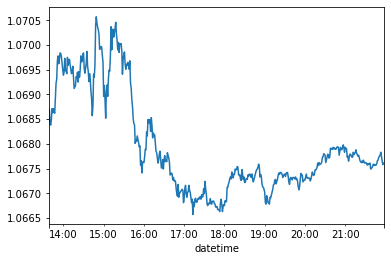

In [4]:
response = pd.DataFrame(finnhub_client.forex_candles('OANDA:EUR_USD', '1', 1230768000, int(datetime.timestamp(datetime.now()))))

fx = pd.DataFrame(response).rename(columns = {'o': 'open', 'h': 'high', 'l': 'low', 'c': 'close'})
fx['datetime'] = pd.to_datetime(fx['t'], unit='s')
fx = fx.set_index('datetime')
fx['close'][-500:].plot()

In [5]:
fx.between_time('20:59', '21:15')

,close,high,low,open,s,t,v
datetime,,,,,,,
2023-02-10 20:59:00,1.06783,1.06796,1.06777,1.06792,ok,1676062740,65
2023-02-10 21:00:00,1.06793,1.06794,1.06781,1.06782,ok,1676062800,45
2023-02-10 21:01:00,1.06791,1.06794,1.06790,1.06794,ok,1676062860,24
2023-02-10 21:02:00,1.06790,1.06794,1.06789,1.06789,ok,1676062920,12
2023-02-10 21:03:00,1.06773,1.06789,1.06768,1.06785,ok,1676062980,34
2023-02-10 21:04:00,1.06775,1.06779,1.06772,1.06772,ok,1676063040,28
2023-02-10 21:05:00,1.06765,1.06774,1.06762,1.06774,ok,1676063100,31
2023-02-10 21:06:00,1.06773,1.06774,1.06768,1.06768,ok,1676063160,6
2023-02-10 21:07:00,1.06779,1.06782,1.06772,1.06775,ok,1676063220,20
